# feature scaling - standardization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
89,15682268,Male,35,50000,0
112,15619653,Male,38,61000,0
314,15747097,Female,39,79000,0
385,15775335,Male,56,60000,1
285,15734161,Female,37,93000,1


In [3]:
ndf=df.iloc[:, 2:]
ndf.sample(5)

,Age,EstimatedSalary,Purchased
189,28,32000,0
56,23,48000,0
193,19,70000,0
275,57,74000,1
30,31,74000,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test=train_test_split(ndf.drop("Purchased", axis=1), df["Purchased"], test_size=0.3, random_state=0)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280,)
(120,)


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


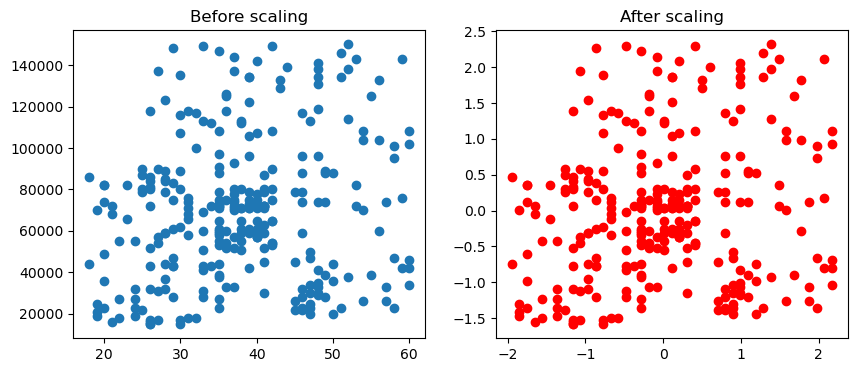

In [15]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,4))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="r")
ax2.set_title("After scaling")

plt.show()

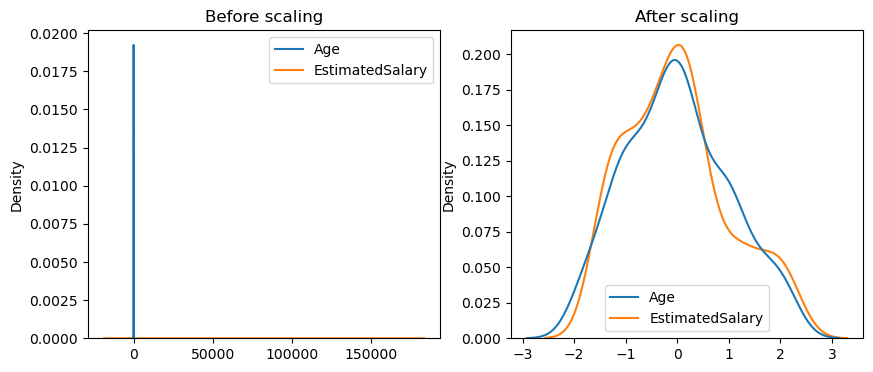

In [16]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,4))

sns.kdeplot(X_train, ax=ax1)
ax1.set_title("Before scaling")

sns.kdeplot(X_train_scaled, ax=ax2)
ax2.set_title("After scaling")

plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [19]:
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(X_test)

In [22]:
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("actual", accuracy_score(y_test, y_pred))
print("scaled", accuracy_score(y_test, y_pred_scaled))

actual 0.6583333333333333
scaled 0.8666666666666667


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [27]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dt.predict(X_test)

In [30]:
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [31]:
print("actual", accuracy_score(y_test, y_pred))
print("scaled", accuracy_score(y_test, y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


In [32]:
ndf1=pd.DataFrame({"Age":[4,90,99], "EstimatedSalary":[1000, 250000, 350000], "Purchased":[0,1,1]})

In [33]:
fdf=pd.concat([ndf, ndf1])
fdf.shape

(403, 3)

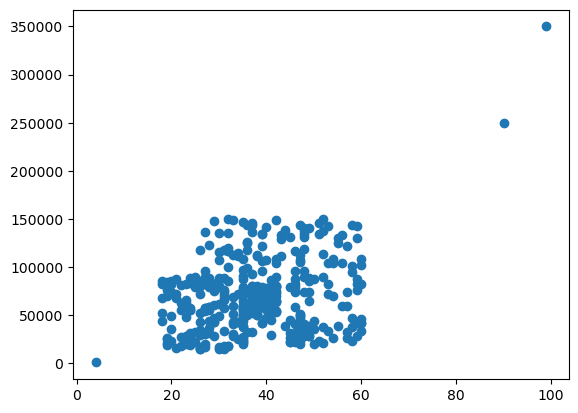

In [34]:
plt.scatter(fdf["Age"], fdf["EstimatedSalary"])

In [35]:
X_train, X_test, y_train, y_test=train_test_split(fdf.drop("Purchased", axis=1), fdf["Purchased"], test_size=0.3, random_state=0)

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

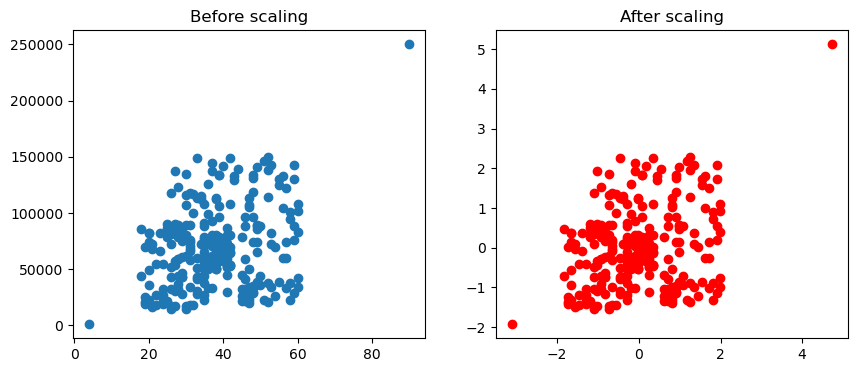

In [39]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,4))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="r")
ax2.set_title("After scaling")

plt.show()

# Feature scaling - normalization (minmax scaling, mean scaling, maxabs scaling, robust scaling)

In [40]:
df=pd.read_csv("wine_data.csv", header=None).iloc[:, :3]
df.columns=["Class_label", "Alcohol", "Malic_acid"]

In [41]:
df

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

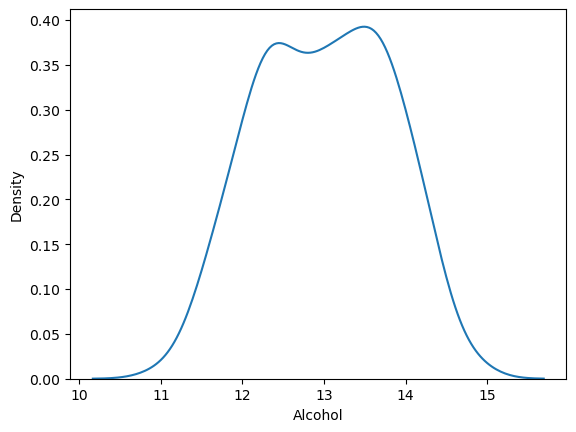

In [42]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic_acid', ylabel='Density'>

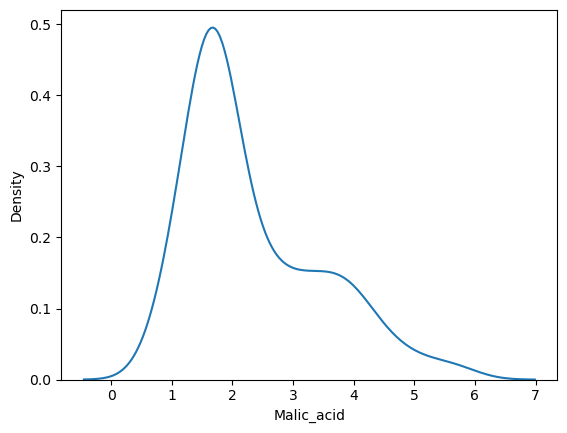

In [43]:
sns.kdeplot(df["Malic_acid"])

<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

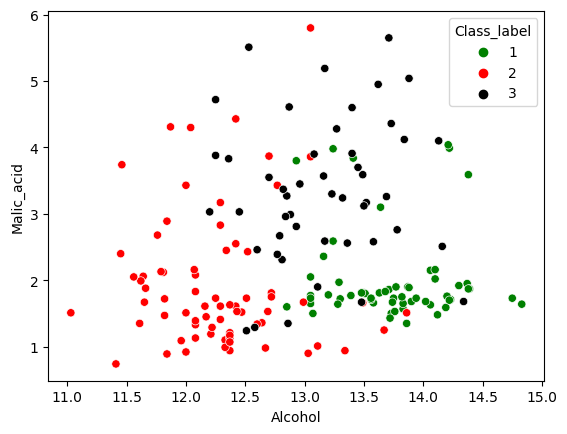

In [44]:
color_dict={1:"green", 2:"red", 3:"black"}
sns.scatterplot(x=df["Alcohol"], y=df["Malic_acid"], hue=df["Class_label"], palette=color_dict)

In [45]:
X_train, X_test, y_train, y_test=train_test_split(df.drop("Class_label", axis=1), df["Class_label"], test_size=0.30, random_state=0)

In [46]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
mms=MinMaxScaler()

In [49]:
mms.fit(X_train)

MinMaxScaler()

In [50]:
X_train_scaled=mms.transform(X_train)
X_test_scaled=mms.transform(X_test)

In [51]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [52]:
round(X_train.describe())

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [53]:
round(X_train_scaled.describe())

,Alcohol,Malic_acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


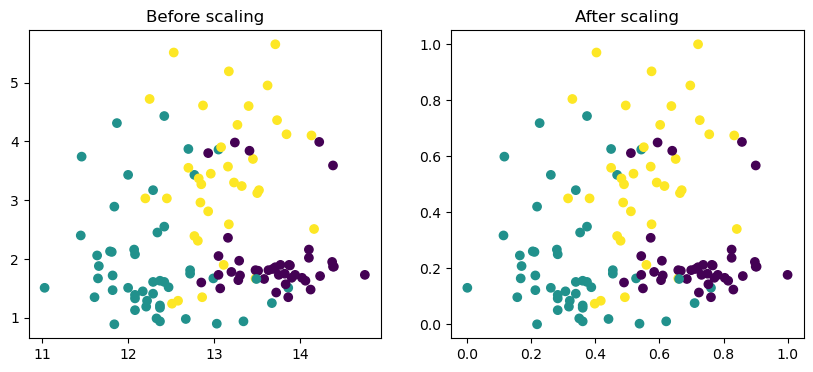

In [54]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,4))

ax1.scatter(X_train["Alcohol"], X_train["Malic_acid"], c=y_train)
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic_acid"], c=y_train)
ax2.set_title("After scaling")

plt.show()

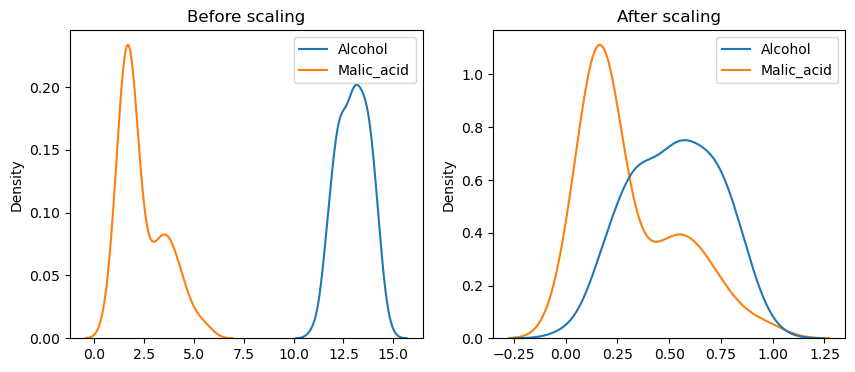

In [55]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,4))

sns.kdeplot(X_train, ax=ax1)
ax1.set_title("Before scaling")

sns.kdeplot(X_train_scaled, ax=ax2)
ax2.set_title("After scaling")

plt.show()

# encoding catagorical data, ordinal encoding, label encoding

In [56]:
import pandas as pd
import numpy as np

In [57]:
df=pd.read_csv("customer.csv")
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [58]:
df=df.iloc[:, 2:]

In [59]:
df.shape

(50, 3)

In [60]:
X_train, X_test, y_train, y_test=train_test_split(df.drop("purchased", axis=1), df["purchased"], test_size=0.25, random_state=0)

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
oe=OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])

In [63]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [64]:
X_train=oe.transform(X_train)
X_test=oe.transform(X_test)

In [65]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
le.fit(y_train)

LabelEncoder()

In [69]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [70]:
le.classes_

array(['No', 'Yes'], dtype=object)

# one hot encoding

In [71]:
import pandas as pd
import numpy as np

In [72]:
df=pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [73]:
df["fuel"].nunique(), df["owner"].nunique()

(4, 5)

In [74]:
pd.get_dummies(df, columns=["fuel","owner"], drop_first=True, dtype=int)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [75]:
X_train, X_test, y_train, y_test=train_test_split(df.drop("selling_price", axis=1), df["selling_price"], test_size=0.25, random_state=0)

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
ohe=OneHotEncoder(drop="first", dtype="int32")

In [78]:
X_train_new=ohe.fit_transform(X_train[["fuel", "owner"]]).toarray()

In [79]:
X_test_new=ohe.transform(X_test[["fuel", "owner"]]).toarray()

In [80]:
np.hstack((X_train[["brand", "km_driven"]].values, X_train_new))[:5]

array([['Hyundai', 40000, 0, 0, 1, 0, 0, 0, 0],
       ['Mercedes-Benz', 120000, 0, 0, 1, 0, 0, 0, 0],
       ['Hyundai', 80000, 0, 0, 1, 0, 1, 0, 0],
       ['Chevrolet', 100000, 1, 0, 0, 0, 0, 0, 0],
       ['Maruti', 77000, 1, 0, 0, 0, 0, 0, 0]], dtype=object)

In [81]:
count=df["brand"].value_counts()

In [82]:
threshold=100

In [83]:
repl=count[count<=threshold].index

In [84]:
pd.get_dummies(df["brand"].replace(repl, "uncommon"), dtype="int32")

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0


# column transformer

In [85]:
import pandas as pd
import numpy as np

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [87]:
df=pd.read_csv("covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=["has_covid"]), df["has_covid"], test_size=0.2)

In [90]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [91]:
si=SimpleImputer()
X_train_fever=si.fit_transform(X_train[["fever"]])
X_test_fever=si.fit_transform(X_test[["fever"]])

In [92]:
X_train_fever.shape

(80, 1)

In [93]:
oe=OrdinalEncoder(categories=[["Mild", "Strong"]])
X_train_cough=oe.fit_transform(X_train[["cough"]])
X_test_cough=oe.fit_transform(X_test[["cough"]])

In [94]:
X_train.shape

(80, 5)

In [95]:
ohe=OneHotEncoder(drop="first", sparse=False)
X_train_gender_city=ohe.fit_transform(X_train[["gender", "city"]])
X_test_gender_city=ohe.fit_transform(X_test[["gender", "city"]])

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
X_train_gender_city[:5]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 1., 0.]])

In [97]:
X_train_age=X_train.drop(columns=["gender", "fever", "cough", "city"]).values
X_test_age=X_test.drop(columns=["gender", "fever", "cough", "city"]).values

In [98]:
X_train_transformed=np.concatenate((X_train_age, X_train_fever, X_train_cough, X_train_gender_city), axis=1)
X_test_transformed=np.concatenate((X_test_age, X_test_fever, X_test_cough, X_test_gender_city), axis=1)

In [99]:
X_train_transformed

array([[ 81.  ,  98.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ],
       [ 31.  ,  98.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [ 84.  , 100.75,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ 65.  ,  99.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ],
       [ 71.  , 100.75,   1.  ,   1.  ,   0.  ,   1.  ,   0.  ],
       [ 13.  , 100.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [ 38.  , 101.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ 11.  , 100.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [ 47.  , 101.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ],
       [  8.  , 101.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [ 60.  , 103.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ],
       [ 34.  , 104.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  5.  , 102.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ],
       [ 33.  , 102.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [ 15.  , 101.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ],
       [ 12.  ,  98.  ,  

In [100]:
from sklearn.compose import ColumnTransformer

In [101]:
transformer=ColumnTransformer(transformers=[
("t1",SimpleImputer(), ["fever"]),
("t2", OrdinalEncoder(categories=[["Mild", "Strong"]]), ["cough"]),
("t3", OneHotEncoder(sparse=False, drop="first"), ["gender", "city"])], remainder="passthrough")

In [102]:
transformer.fit_transform(X_train).shape

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 7)

In [103]:
transformer.fit_transform(X_test).shape

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(20, 7)

# pipelines

In [104]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [105]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [108]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=["Survived"]), df["Survived"], test_size=0.2, random_state=0)

In [109]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [110]:
si_age=SimpleImputer()
si_embarked=SimpleImputer(strategy="most_frequent")

In [111]:
X_train_age=si_age.fit_transform(X_train[["Age"]])
X_test_age=si_age.fit_transform(X_test[["Age"]])

X_train_embarked=si_embarked.fit_transform(X_train[["Embarked"]])
X_test_embarked=si_embarked.fit_transform(X_train[["Embarked"]])

In [112]:
X_train_age.shape

(712, 1)

In [113]:
X_train_embarked.shape

(712, 1)

In [114]:
ohe_sex=OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe_embarked=OneHotEncoder(sparse=False, handle_unknown="ignore")

In [115]:
X_train_sex=ohe_sex.fit_transform(X_train[["Sex"]])
X_train_embarked=ohe_sex.fit_transform(X_train[["Embarked"]])

X_test_sex=ohe_sex.fit_transform(X_test[["Sex"]])
X_test_embarked=ohe_sex.fit_transform(X_test[["Embarked"]])

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [116]:
X_train_embarked

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [117]:
X_train_rem=X_train.drop(columns=["Sex", "Age", "Embarked"])
X_test_rem=X_test.drop(columns=["Sex", "Age", "Embarked"])

In [118]:
X_train_transformed=np.concatenate((X_train_age, X_train_embarked, X_train_sex, X_train_rem), axis=1)
X_test_transformed=np.concatenate((X_test_age, X_test_embarked, X_test_sex, X_test_rem), axis=1)

In [119]:
X_train_transformed.shape

(712, 11)

In [120]:
clf=DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [121]:
X_train_transformed

array([[29.74518389,  1.        ,  0.        , ...,  0.        ,
         2.        , 15.2458    ],
       [31.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 10.5       ],
       [31.        ,  1.        ,  0.        , ...,  1.        ,
         1.        , 37.0042    ],
       ...,
       [29.74518389,  0.        ,  1.        , ...,  0.        ,
         0.        ,  7.7333    ],
       [36.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , 17.4       ],
       [60.        ,  0.        ,  0.        , ...,  1.        ,
         1.        , 39.        ]])

In [122]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=["Survived"]), df["Survived"], test_size=0.2, random_state=9)

In [123]:
trf1=ColumnTransformer([
    ("impute_age", SimpleImputer(), [2]),
    ("impute_embarked", SimpleImputer(strategy="most_frequent"), [6])
], remainder="passthrough")

In [124]:
trf2=ColumnTransformer([
    ("ohe_sex_embarked", OneHotEncoder(sparse=False, handle_unknown="ignore"), [1,6])
], remainder="passthrough")

In [125]:
trf3=ColumnTransformer([
    ("scale", MinMaxScaler(), slice(0,8))
])

In [126]:
from sklearn.feature_selection import SelectKBest, chi2
trf4=SelectKBest(score_func=chi2, k=5)

In [127]:
trf5=DecisionTreeClassifier()

In [128]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ("tr1",trf1),
    ("tr2",trf2),
    ("tr3",trf3),
    ("tr4",trf4),
    ("tr5",trf5)
])

In [129]:
pipe.fit(X_train, y_train)

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('tr3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('tr4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x0000019FEFCAB380>)),
                ('tr5', DecisionTreeClassifier())])

In [130]:
pipe.named_steps["tr1"].transformers_[0][0]

'impute_age'

In [131]:
y_pred=pipe.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y_test, y_pred)

0.6368715083798883

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cross_val_score(pipe,  X_train, y_train, cv=5, scoring="accuracy").mean()

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

0.6362946912242687

In [136]:
import pickle

In [137]:
pickle.dump(pipe, open("pipe.pkl", "wb"))

# function transformer, log transform, reciprocal transform, square root transform

In [138]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [139]:
df=pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [140]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [141]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [142]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [143]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\895528566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


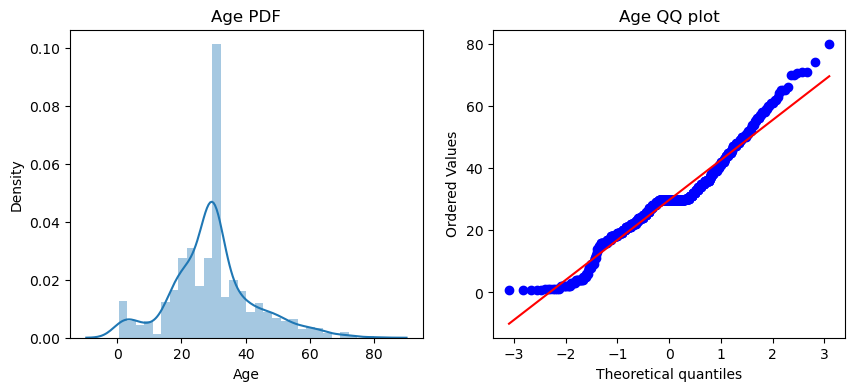

In [144]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(df["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\2917877621.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


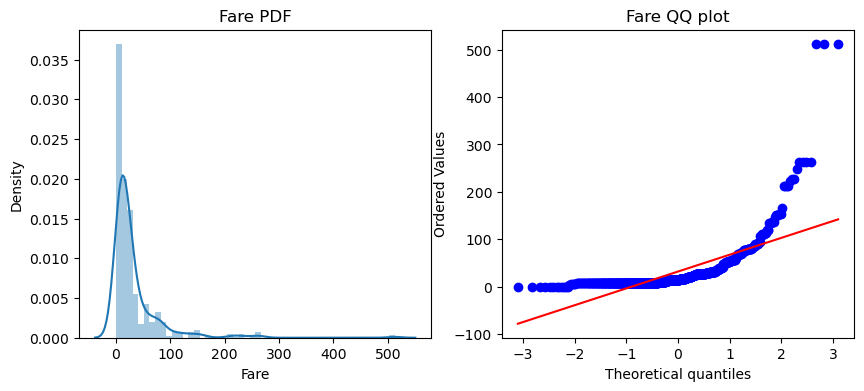

In [145]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(df["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [146]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [147]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

print("LR", accuracy_score(y_test, y_pred1))
print("DT", accuracy_score(y_test, y_pred2))

LR 0.6983240223463687
DT 0.6759776536312849


In [148]:
trf=FunctionTransformer(func=np.log1p)

In [149]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [150]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1=clf1.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("LR", accuracy_score(y_test, y_pred1))
print("DT", accuracy_score(y_test, y_pred2))

LR 0.7039106145251397
DT 0.6703910614525139


In [151]:
X_transformed=trf.fit_transform(X)

In [152]:
print("LR", np.mean(cross_val_score(clf1, X_transformed, y, scoring="accuracy", cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring="accuracy", cv=10)))

LR 0.678027465667915
DT 0.654394506866417


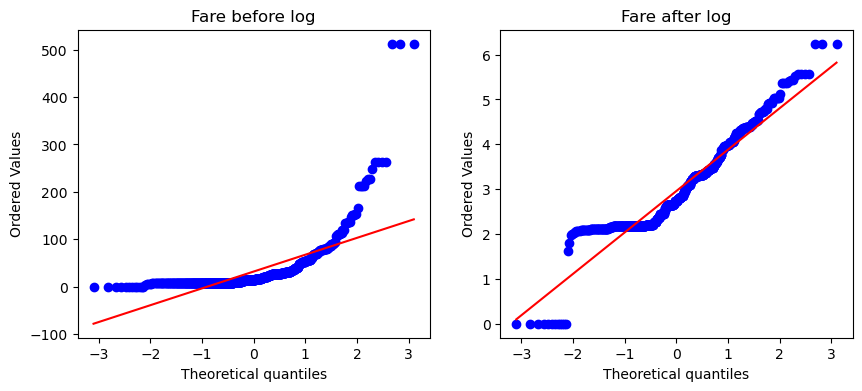

In [153]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"], dist="norm", plot=plt)
plt.title("Fare after log")

plt.show()

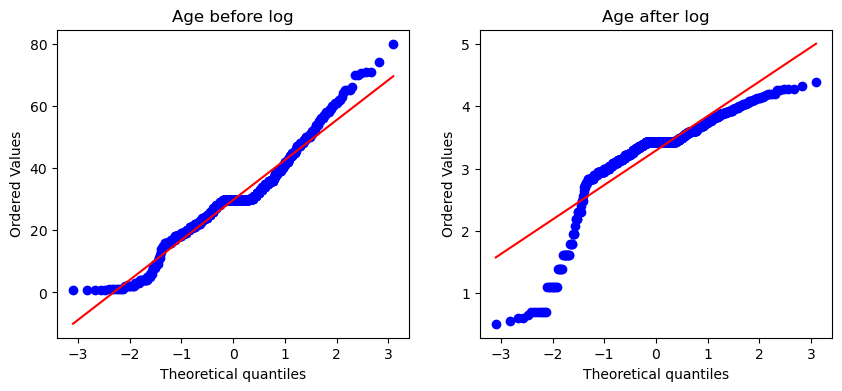

In [154]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age before log")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"], dist="norm", plot=plt)
plt.title("Age after log")

plt.show()

In [155]:
def apply_transform(transform):
    X=df.iloc[:,1:3]
    y=df.iloc[:,0]
    
    trf=ColumnTransformer([("log", FunctionTransformer(transform), ["Fare"])], remainder="passthrough")
    
    X_transformed=trf.fit_transform(X)
    
    clf=LogisticRegression()
    
    print("Accuracy", np.mean(cross_val_score(clf, X_transformed, y, scoring="accuracy", cv=10)))
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(121)
    stats.probplot(X["Fare"], dist="norm", plot=plt)
    plt.title("Fare before transformation")

    plt.subplot(122)
    stats.probplot(X_transformed[:, 0], dist="norm", plot=plt)
    plt.title("Fare after transformation")

    plt.show()

Accuracy 0.61729088639201


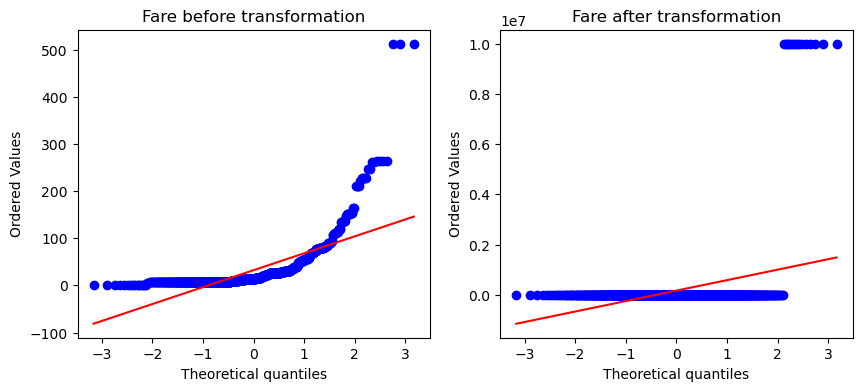

In [156]:
apply_transform(lambda x:1/(x+0.0000001))

# power transformer, box-cox, yeo johnson

In [157]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [158]:
df=pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [159]:
df.shape

(1030, 9)

In [160]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [161]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [162]:
X=df.drop(columns=["Strength"])
y=df.iloc[:, -1]

In [163]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [164]:
lr=LinearRegression()

lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)

r2_score(y_test, y_pred)

0.6369606518338298

In [165]:
np.mean(cross_val_score(lr, X, y, scoring="r2"))

0.4609940491662864

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


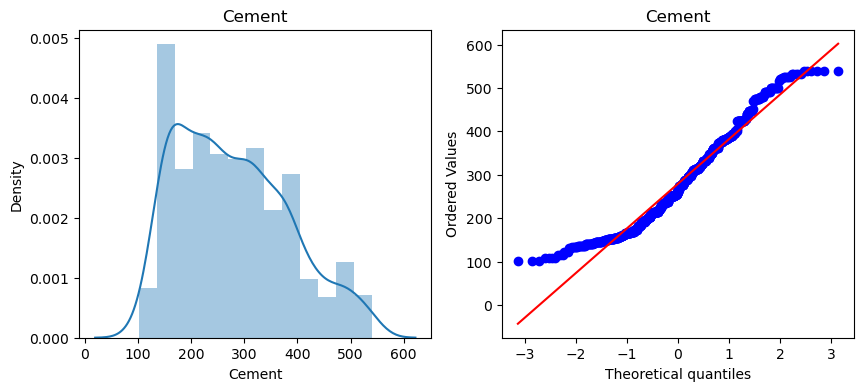

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


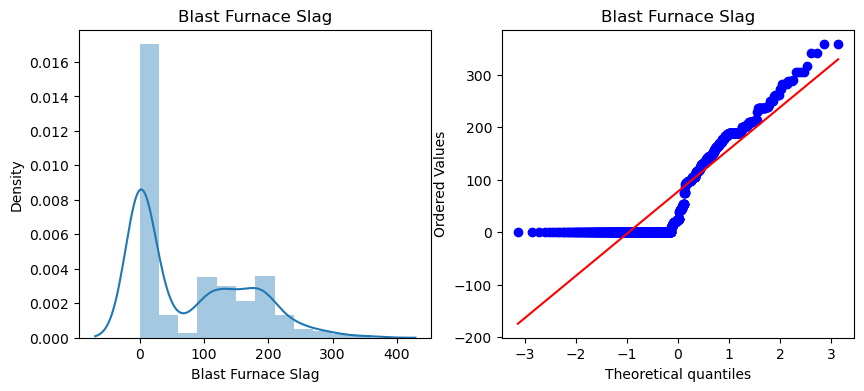

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


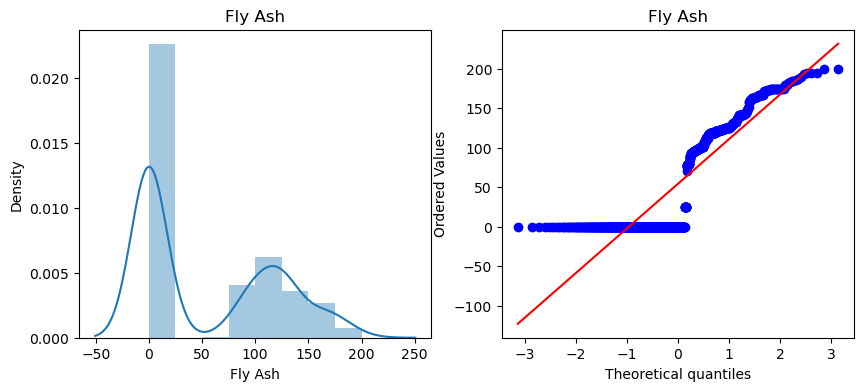

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


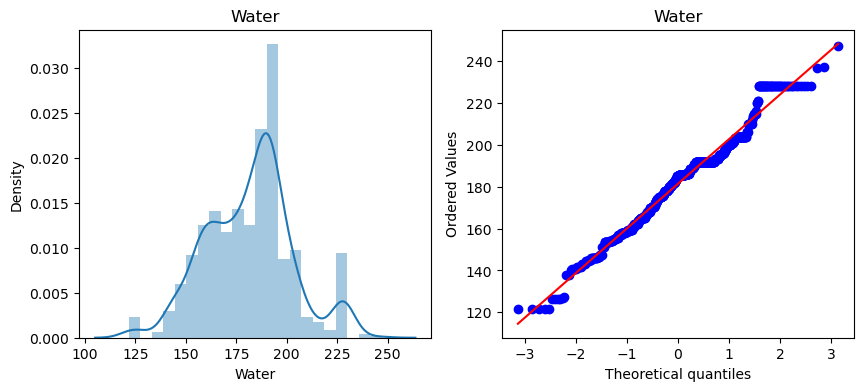

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


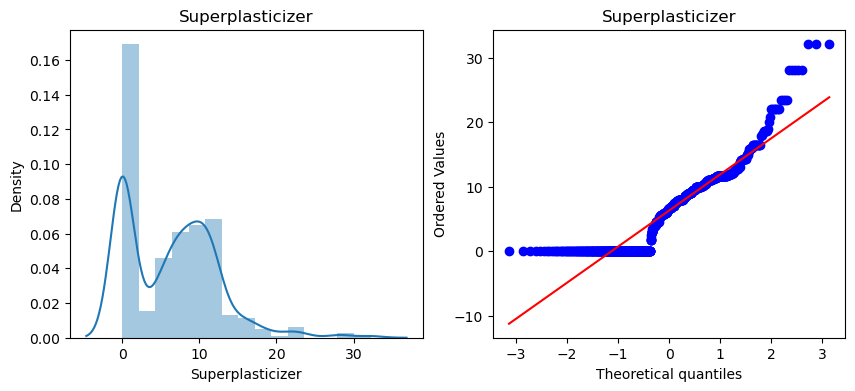

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


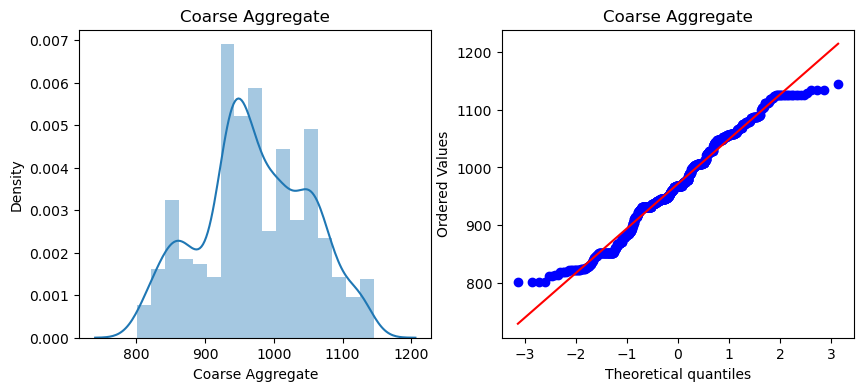

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


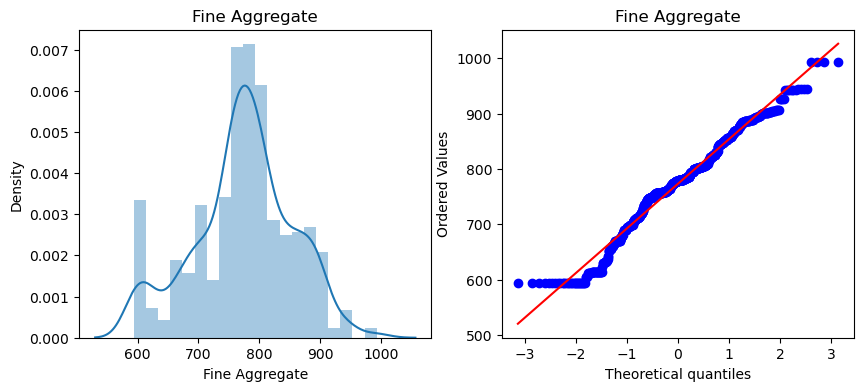

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\1387838404.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


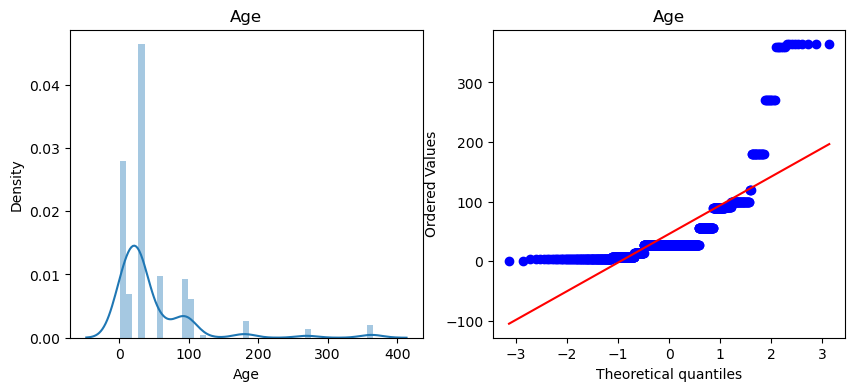

In [166]:
for col in X_train.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    
    plt.show()

In [167]:
trf=PowerTransformer(method="box-cox")

X_train_transformed=trf.fit_transform(X_train+0.00000001)
X_test_transformed=trf.transform(X_test+0.00000001)

pd.DataFrame({"col":X_train.columns, "box-cox lambdas":trf.lambdas_})

,col,box-cox lambdas
0,Cement,0.153049
1,Blast Furnace Slag,0.025802
2,Fly Ash,-0.027291
3,Water,0.888072
4,Superplasticizer,0.085811
5,Coarse Aggregate,1.115680
6,Fine Aggregate,1.789591
7,Age,0.063010


In [178]:
lr=LinearRegression()

lr.fit(X_train_transformed, y_train)
y_pred2=lr.predict(X_train_transformed)

r2_score(y_test, y_pred)

0.6369606518338298

In [171]:
X_train_transformed=pd.DataFrame(X_train_transformed, columns=X_train.columns)

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


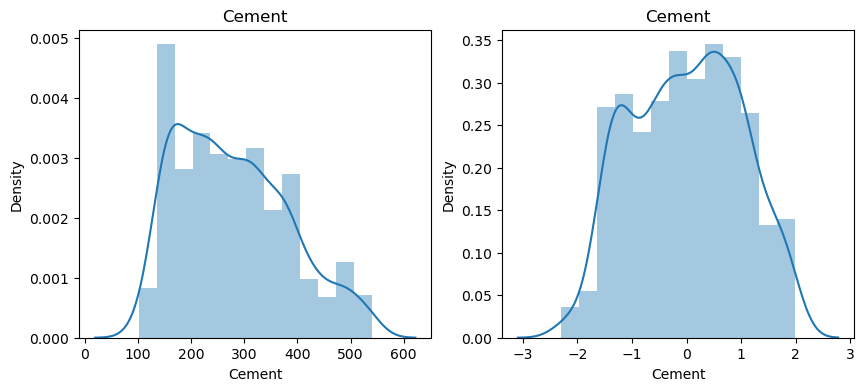

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


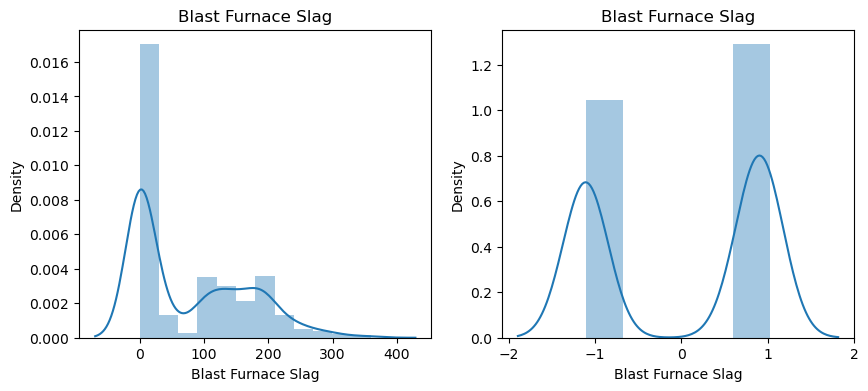

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


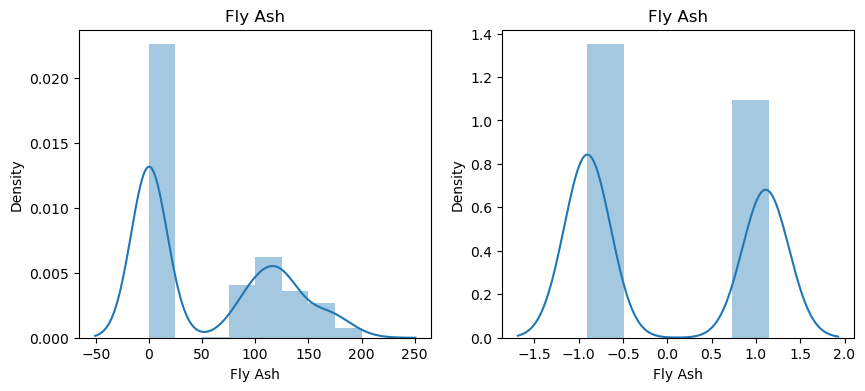

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


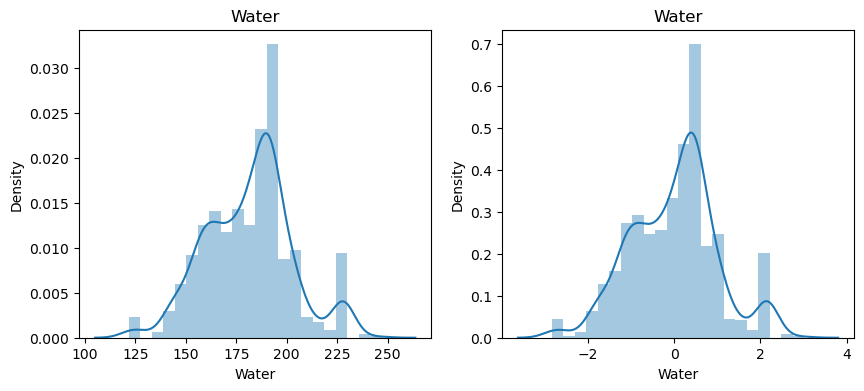

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


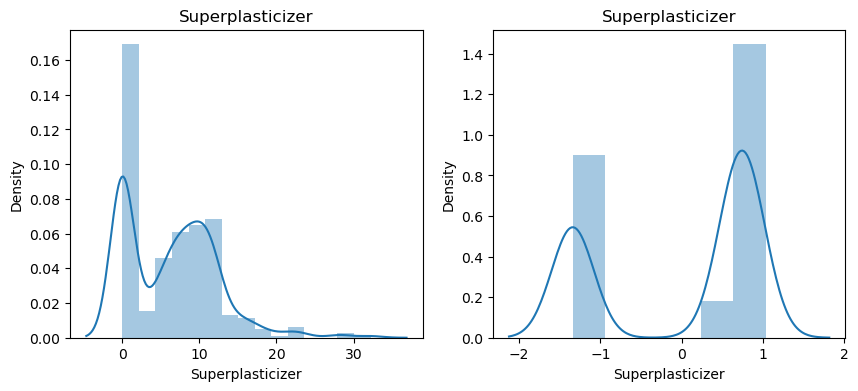

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


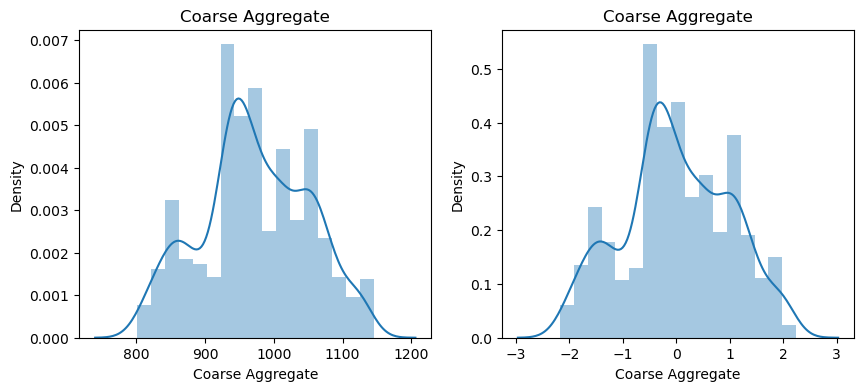

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


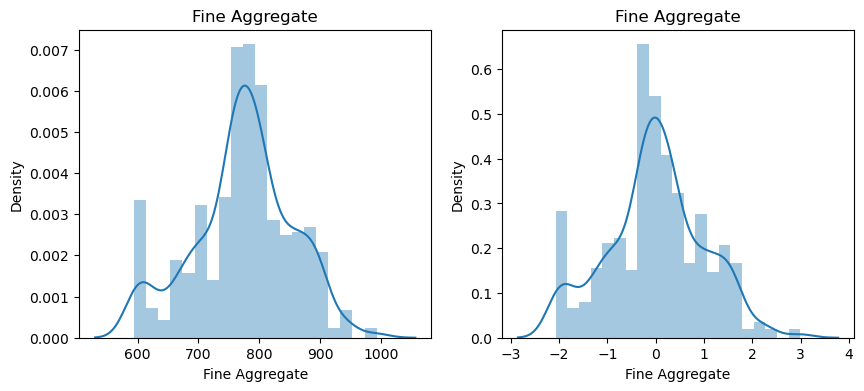

C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\joshi\AppData\Local\Temp\ipykernel_7708\746246691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


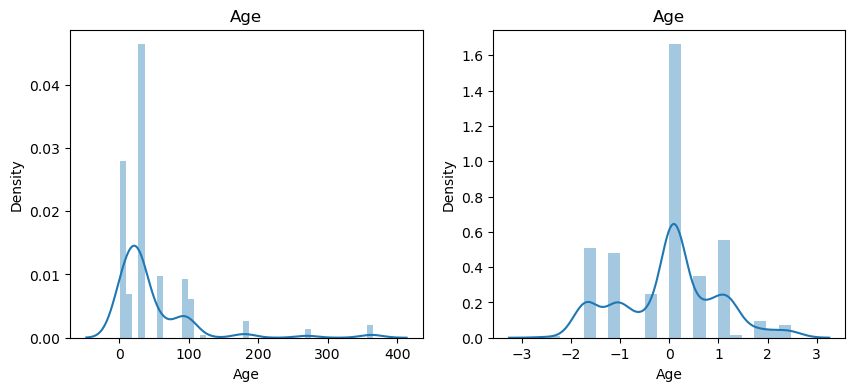

In [173]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

In [175]:
trf2=PowerTransformer()

X_train_transformed=trf2.fit_transform(X_train+0.00000001)
X_test_transformed=trf2.transform(X_test+0.00000001)

pd.DataFrame({"col":X_train.columns, "yeo-johnson lambdas":trf2.lambdas_})

,col,yeo-johnson lambdas
0,Cement,0.150260
1,Blast Furnace Slag,0.038667
2,Fly Ash,-0.141876
3,Water,0.887369
4,Superplasticizer,0.293603
5,Coarse Aggregate,1.115901
6,Fine Aggregate,1.790678
7,Age,0.016397


# Binning and Binarization, discretization, quantile binning, Kmeans binning

In [183]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [187]:
df=pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])

In [188]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [189]:
df.dropna(inplace=True)

In [190]:
df.shape

(714, 3)

In [204]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [205]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [209]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6293706293706294

In [212]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy"))

0.6373239436619718

In [218]:
kbin_age=KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
kbin_fare=KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

In [221]:
trf=ColumnTransformer([
    ("first", kbin_age, [0]),
    ("second", kbin_fare, [1])
])

In [224]:
X_train_transform=trf.fit_transform(X_train)
X_test_transform=trf.transform(X_test)

In [226]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.67, 14.  , 18.  , 22.  , 25.  , 28.  , 31.  , 35.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [228]:
clf=DecisionTreeClassifier()
clf.fit(X_train_transform, y_train)
y_pred2=clf.predict(X_test)

accuracy_score(y_test, y_pred2)

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6153846153846154

In [234]:
def discretizer(bins, strategy):
    kbin_age=KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    kbin_fare=KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    
    trf=ColumnTransformer([
    ("first", kbin_age, [0]),
    ("second", kbin_fare, [1])
    ])
    
    X_trf=trf.fit_transform(X)
    
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy")))
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.hist(X["Age"])
    plt.title("Age_Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color="red")
    plt.title("Age_After")
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.hist(X["Fare"])
    plt.title("Fare_Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color="red")
    plt.title("Fare_After")
    
    plt.show()

0.6316901408450704


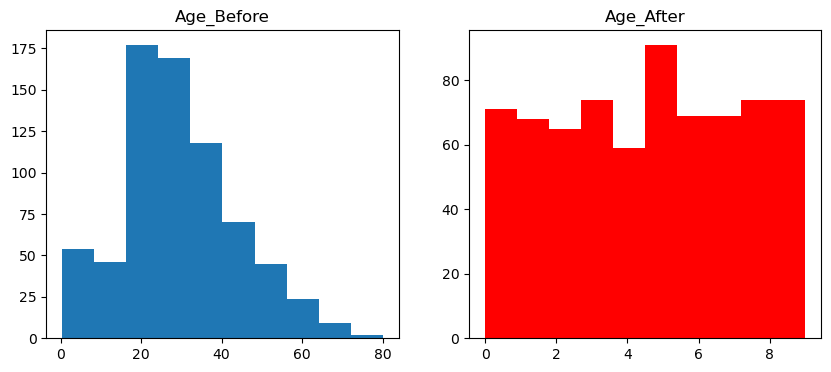

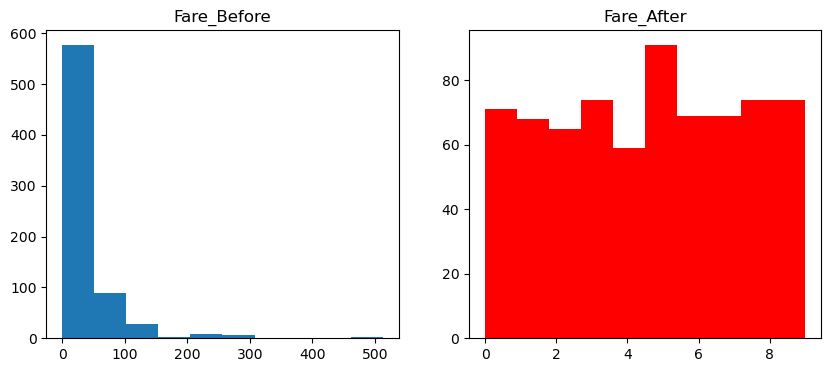

In [239]:
discretizer(20, "quantile")

In [241]:
df=pd.read_csv("titanic.csv", usecols=["Age", "Fare","SibSp", "Parch", "Survived"])

In [242]:
df.dropna(inplace=True)

In [243]:
df.shape

(714, 5)

In [245]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [247]:
df["Family"]=df["SibSp"]+df["Parch"]

In [249]:
df.drop(columns=["Age","SibSp"])

,Survived,Parch,Fare,Family
0,0,0,7.2500,1
1,1,0,71.2833,1
2,1,0,7.9250,0
3,1,0,53.1000,1
4,0,0,8.0500,0
...,...,...,...,...
885,0,5,29.1250,5
886,0,0,13.0000,0
887,1,0,30.0000,0
889,1,0,30.0000,0


In [250]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [251]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [252]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6433566433566433

In [254]:
from sklearn.preprocessing import Binarizer

In [259]:
trf=ColumnTransformer([
    ("bin", Binarizer(copy=False), ["Family"])
], remainder="passthrough")

In [261]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [267]:
pd.DataFrame(X_train_trf)

,0,1,2,3,4
0,0.0,36.0,0.0,0.0,13.0000
1,1.0,25.0,1.0,2.0,41.5792
2,0.0,35.0,0.0,0.0,26.0000
3,0.0,45.5,0.0,0.0,28.5000
4,0.0,31.0,0.0,0.0,7.8542
...,...,...,...,...,...
566,0.0,28.0,0.0,0.0,10.5000
567,0.0,19.0,0.0,0.0,10.5000
568,0.0,46.0,0.0,0.0,79.2000
569,1.0,26.0,1.0,0.0,7.8542


In [268]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred=clf.predict(X_test_trf)

accuracy_score(y_test, y_pred)

0.6293706293706294

# handling mixed variable

In [270]:
df=pd.read_csv("titanic (1).csv")
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [271]:
df["number"].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger travelling with')

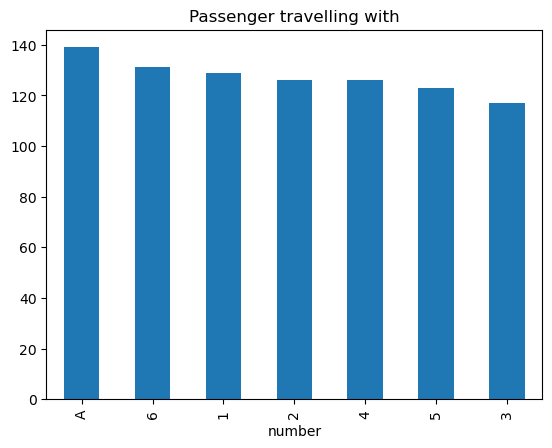

In [275]:
fig=df["number"].value_counts().plot.bar()
fig.set_title("Passenger travelling with")

In [280]:
df["number_numeric"]=pd.to_numeric(df["number"], errors="coerce", downcast="integer")

In [285]:
df["number_cat"]=np.where(df["number_numeric"].isnull(), df["number"], np.nan)

In [288]:
df.drop(columns=["number"], inplace=True)

In [289]:
df

,Cabin,Ticket,Survived,number_numeric,number_cat
0,NaN,A/5 21171,0,5.0,NaN
1,C85,PC 17599,1,3.0,NaN
2,NaN,STON/O2. 3101282,1,6.0,NaN
3,C123,113803,1,3.0,NaN
4,NaN,373450,0,NaN,A
...,...,...,...,...,...
886,NaN,211536,0,3.0,NaN
887,B42,112053,1,3.0,NaN
888,NaN,W./C. 6607,0,1.0,NaN
889,C148,111369,1,2.0,NaN


In [291]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [293]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [302]:
df["cabin_num"]=df["Cabin"].str.extract('(\d+)')
df["cabin_cat"]=df["Cabin"].str[0]

In [304]:
df.drop(columns=["Cabin"], inplace=True)

In [305]:
df

,Ticket,Survived,number_numeric,number_cat,cabin_num,cabin_cat
0,A/5 21171,0,5.0,NaN,NaN,NaN
1,PC 17599,1,3.0,NaN,85,C
2,STON/O2. 3101282,1,6.0,NaN,NaN,NaN
3,113803,1,3.0,NaN,123,C
4,373450,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...
886,211536,0,3.0,NaN,NaN,NaN
887,112053,1,3.0,NaN,42,B
888,W./C. 6607,0,1.0,NaN,NaN,NaN
889,111369,1,2.0,NaN,148,C


<Axes: xlabel='cabin_cat'>

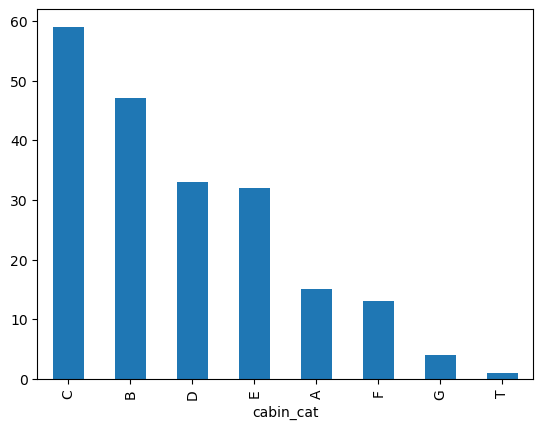

In [309]:
df["cabin_cat"].value_counts().plot(kind="bar")

# handling date and time variables

In [313]:
date=pd.read_csv("orders (2).csv")
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [359]:
time=pd.read_csv("messages.csv")
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [360]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1000 non-null   datetime64[ns]
 1   product_id       1000 non-null   int64         
 2   city_id          1000 non-null   int64         
 3   orders           1000 non-null   int64         
 4   year             1000 non-null   int32         
 5   month            1000 non-null   object        
 6   day              1000 non-null   object        
 7   date_is_weekend  1000 non-null   int32         
 8   quarter          1000 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(3), object(2)
memory usage: 58.7+ KB


In [361]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [362]:
date["date"]=pd.to_datetime(date["date"])

In [363]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1000 non-null   datetime64[ns]
 1   product_id       1000 non-null   int64         
 2   city_id          1000 non-null   int64         
 3   orders           1000 non-null   int64         
 4   year             1000 non-null   int32         
 5   month            1000 non-null   object        
 6   day              1000 non-null   object        
 7   date_is_weekend  1000 non-null   int32         
 8   quarter          1000 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(3), object(2)
memory usage: 58.7+ KB


In [364]:
date["year"]=date["date"].dt.year
date["month"]=date["date"].dt.month_name()
date["day"]=date["date"].dt.day_name()

In [365]:
date.head()

,date,product_id,city_id,orders,year,month,day,date_is_weekend,quarter
0,2019-12-10,5628,25,3,2019,December,Tuesday,0,4
1,2018-08-15,3646,14,157,2018,August,Wednesday,0,3
2,2018-10-23,1859,25,1,2018,October,Tuesday,0,4
3,2019-08-17,7292,25,1,2019,August,Saturday,1,3
4,2019-01-06,4344,25,3,2019,January,Sunday,1,1


In [366]:
date["date_is_weekend"]=np.where(date["day"].isin(["Saturday", "Sunday"]), 1, 0)

In [367]:
date

,date,product_id,city_id,orders,year,month,day,date_is_weekend,quarter
0,2019-12-10,5628,25,3,2019,December,Tuesday,0,4
1,2018-08-15,3646,14,157,2018,August,Wednesday,0,3
2,2018-10-23,1859,25,1,2018,October,Tuesday,0,4
3,2019-08-17,7292,25,1,2019,August,Saturday,1,3
4,2019-01-06,4344,25,3,2019,January,Sunday,1,1
...,...,...,...,...,...,...,...,...,...
995,2018-10-08,255,13,1,2018,October,Monday,0,4
996,2018-12-06,5521,7,1,2018,December,Thursday,0,4
997,2019-05-07,487,26,14,2019,May,Tuesday,0,2
998,2019-03-03,1503,21,2,2019,March,Sunday,1,1


In [368]:
date["quarter"]=date["date"].dt.quarter

In [369]:
date.head()

,date,product_id,city_id,orders,year,month,day,date_is_weekend,quarter
0,2019-12-10,5628,25,3,2019,December,Tuesday,0,4
1,2018-08-15,3646,14,157,2018,August,Wednesday,0,3
2,2018-10-23,1859,25,1,2018,October,Tuesday,0,4
3,2019-08-17,7292,25,1,2019,August,Saturday,1,3
4,2019-01-06,4344,25,3,2019,January,Sunday,1,1


In [370]:
time["date"]=pd.to_datetime(time["date"])

In [371]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [372]:
time["hour"]=time["date"].dt.hour
time["min"]=time["date"].dt.minute
time["sec"]=time["date"].dt.second

In [373]:
time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [376]:
time["time"]=time["date"].dt.time

In [377]:
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00
